In [1]:
import sys
import os

# Add the parent directory (project root) to sys.path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df_aple = pd.read_csv(f'../data/yfinance_data/AAPL_historical_data.csv')

In [4]:
# Ensure datetime type
df["date"] = pd.to_datetime(df["date"], format='mixed', utc=True).dt.date
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [5]:
df_aple["Date"] = pd.to_datetime(df_aple["Date"], errors='coerce')

In [6]:
print(df_aple["Date"].dtype)

datetime64[ns]


In [7]:
from textblob import TextBlob

# Filter rows where stock == 'AAPL'
df_aapl = df[df['stock'] == 'AAPL'].copy()

# Apply sentiment polarity to the headlines in the filtered dataframe
df_aapl['sentiment'] = df_aapl['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [8]:
df_aapl.shape

(441, 7)

In [9]:
daily_sentiment = df_aapl.groupby('date')['sentiment'].mean().reset_index()

In [10]:
print(daily_sentiment['date'].nunique())
print(daily_sentiment['date'].sort_values().head(10))
print(daily_sentiment['date'].sort_values().tail(10))

80
0   2020-03-09
1   2020-03-10
2   2020-03-11
3   2020-03-12
4   2020-03-13
5   2020-03-14
6   2020-03-15
7   2020-03-16
8   2020-03-17
9   2020-03-18
Name: date, dtype: datetime64[ns]
70   2020-05-25
71   2020-05-26
72   2020-05-27
73   2020-05-28
74   2020-05-29
75   2020-05-31
76   2020-06-01
77   2020-06-02
78   2020-06-09
79   2020-06-10
Name: date, dtype: datetime64[ns]


In [11]:
print(df_aapl['date'].nunique())

80


In [12]:
df_aple.sort_values(by='Date', inplace=True)
df_aple['daily_return'] = df_aple['Close'].pct_change()

# Keep only relevant columns
stock_df_filtered = df_aple[['Date', 'Close', 'daily_return']]

In [13]:
print(daily_sentiment.columns)
print(daily_sentiment['date'].dtype)

Index(['date', 'sentiment'], dtype='object')
datetime64[ns]


In [14]:
stock_df_filtered = stock_df_filtered.rename(columns={'Date': 'date'})

In [15]:

# Now merge on 'date'
merged_df = pd.merge(daily_sentiment, stock_df_filtered, on='date', how='inner')

# Drop rows with missing values if needed
merged_df.dropna(inplace=True)

In [16]:
merged_df.head()

,date,sentiment,Close,daily_return
0,2020-03-09,-0.155556,66.542503,-0.079092
1,2020-03-10,0.021708,71.334999,0.072022
2,2020-03-11,0.018624,68.857498,-0.034731
3,2020-03-12,-0.083048,62.057499,-0.098755
4,2020-03-13,0.069215,69.492500,0.119808


In [17]:
correlation = merged_df['sentiment'].corr(merged_df['daily_return'])
print(f"📈 Correlation between sentiment and stock return: {correlation:.4f}")

📈 Correlation between sentiment and stock return: 0.1589


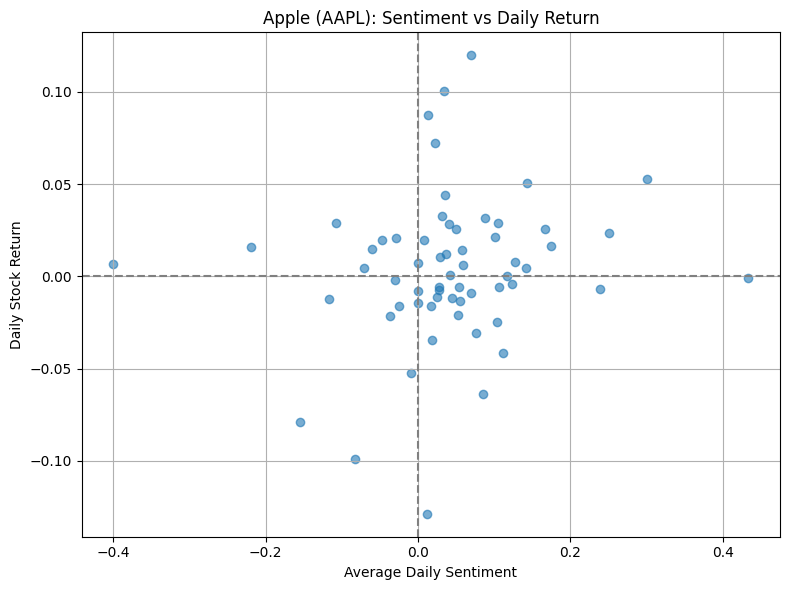

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['sentiment'], merged_df['daily_return'], alpha=0.6)
plt.title("Apple (AAPL): Sentiment vs Daily Return")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Stock Return")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

## Overall Observation and Implied Relationship:

### Positive Correlation (Slight Tendency):
There appears to be a general, albeit weak, positive correlation between average daily sentiment and daily stock return. Points tend to be more concentrated in the top-right and bottom-left quadrants. This suggests that positive sentiment tends to be associated with positive returns, and negative sentiment with negative returns.

### No Strong Linear Relationship:
While there's a tendency, the points are quite scattered, and there isn't a tight linear pattern. This implies that sentiment is not the sole driver of daily stock returns for Apple. Other market factors, company-specific news, broader economic conditions, etc., likely play significant roles.

### Sentiment as an Indicator (but not a perfect predictor):
The plot suggests that sentiment can be an indicator of market movement, but it's not a perfect predictor. There are instances where sentiment and return move in opposite directions. For example, some days with moderately positive sentiment result in negative returns (bottom right), and vice-versa (top left).

---

In conclusion, the scatter plot illustrates that for Apple (AAPL), there's a tendency for daily stock returns to align with daily sentiment, but the relationship is not perfectly strong, indicating that other variables also influence stock price movements.